## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import statsModel
import scrapbook as sb 
import torch 
import statsModel
import baselineModels
import friedman3Dataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split
import numpy as np

## Import Dataset 


In [3]:
n_features = 4
n_samples= 100
n_target = 1
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  39.160598  1682.679901  0.999915  7.254192  1.536225
1  47.572564   768.562180  0.121801  8.823750  1.010019
2  54.373093   937.813276  0.806599  8.143358  1.422239
3  11.518486  1255.704619  0.448018  3.685084  1.569692
4  39.904708  1185.515946  0.996876  5.438367  1.534350


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)

print(X.shape)
print(Y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(100, 4)
(100,)
(80, 4)
(80,)
(20, 4)
(20,)


## Stats Model 



No handles with labels found to put in legend.


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.576
Model:                            OLS   Adj. R-squared (uncentered):              0.554
Method:                 Least Squares   F-statistic:                              25.79
Date:                Wed, 22 Jun 2022   Prob (F-statistic):                    1.61e-13
Time:                        16:19:58   Log-Likelihood:                         -67.940
No. Observations:                  80   AIC:                                      143.9
Df Residuals:                      76   BIC:                                      153.4
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

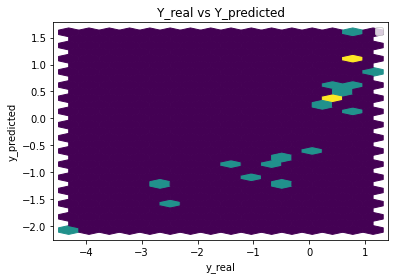

Performance Metrics
Mean Squared Error: 0.540966564954309
Mean Absolute Error: 0.520280503948767
Manhattan distance: 10.405610078975345
Euclidean distance: 3.289275193577786


In [5]:
coefficients , y_pred =statsModel.statsModel(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Coefficients",coefficients)

# Catboost Model 

In [6]:
mae_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MSE Value
sb.glue("Catboost MAE",mae_cb)

Learning rate set to 0.027471
0:	learn: 0.8549850	total: 56.3ms	remaining: 56.2s
1:	learn: 0.8481458	total: 57.3ms	remaining: 28.6s
2:	learn: 0.8396193	total: 58.5ms	remaining: 19.4s
3:	learn: 0.8308347	total: 59.5ms	remaining: 14.8s
4:	learn: 0.8231819	total: 60.3ms	remaining: 12s
5:	learn: 0.8159204	total: 61.4ms	remaining: 10.2s
6:	learn: 0.8070085	total: 61.7ms	remaining: 8.75s
7:	learn: 0.7993910	total: 62.4ms	remaining: 7.73s
8:	learn: 0.7939975	total: 65ms	remaining: 7.16s
9:	learn: 0.7888385	total: 65.8ms	remaining: 6.51s
10:	learn: 0.7803944	total: 66.3ms	remaining: 5.96s
11:	learn: 0.7716495	total: 66.9ms	remaining: 5.5s
12:	learn: 0.7635262	total: 67.5ms	remaining: 5.13s
13:	learn: 0.7553901	total: 68ms	remaining: 4.79s
14:	learn: 0.7509358	total: 68.5ms	remaining: 4.5s
15:	learn: 0.7415742	total: 68.9ms	remaining: 4.23s
16:	learn: 0.7355884	total: 69.4ms	remaining: 4.01s
17:	learn: 0.7280443	total: 70.1ms	remaining: 3.83s
18:	learn: 0.7198621	total: 70.7ms	remaining: 3.65s


78:	learn: 0.4493108	total: 98.2ms	remaining: 1.14s
79:	learn: 0.4471307	total: 98.8ms	remaining: 1.14s
80:	learn: 0.4440106	total: 99.2ms	remaining: 1.13s
81:	learn: 0.4426699	total: 99.5ms	remaining: 1.11s
82:	learn: 0.4390870	total: 100ms	remaining: 1.1s
83:	learn: 0.4362688	total: 100ms	remaining: 1.09s
84:	learn: 0.4329652	total: 101ms	remaining: 1.09s
85:	learn: 0.4300575	total: 101ms	remaining: 1.08s
86:	learn: 0.4273826	total: 102ms	remaining: 1.07s
87:	learn: 0.4248568	total: 103ms	remaining: 1.06s
88:	learn: 0.4211244	total: 103ms	remaining: 1.05s
89:	learn: 0.4194403	total: 104ms	remaining: 1.05s
90:	learn: 0.4164492	total: 104ms	remaining: 1.04s
91:	learn: 0.4139688	total: 104ms	remaining: 1.03s
92:	learn: 0.4109859	total: 105ms	remaining: 1.02s
93:	learn: 0.4090468	total: 105ms	remaining: 1.01s
94:	learn: 0.4065201	total: 105ms	remaining: 1s
95:	learn: 0.4038757	total: 106ms	remaining: 998ms
96:	learn: 0.4012399	total: 106ms	remaining: 990ms
97:	learn: 0.3985680	total: 107

203:	learn: 0.2539876	total: 154ms	remaining: 600ms
204:	learn: 0.2533800	total: 154ms	remaining: 599ms
205:	learn: 0.2522204	total: 155ms	remaining: 597ms
206:	learn: 0.2517586	total: 155ms	remaining: 595ms
207:	learn: 0.2511761	total: 156ms	remaining: 593ms
208:	learn: 0.2505314	total: 156ms	remaining: 591ms
209:	learn: 0.2498618	total: 157ms	remaining: 589ms
210:	learn: 0.2494122	total: 157ms	remaining: 587ms
211:	learn: 0.2483826	total: 157ms	remaining: 585ms
212:	learn: 0.2474585	total: 158ms	remaining: 583ms
213:	learn: 0.2466809	total: 158ms	remaining: 581ms
214:	learn: 0.2461300	total: 159ms	remaining: 579ms
215:	learn: 0.2451540	total: 159ms	remaining: 577ms
216:	learn: 0.2442395	total: 159ms	remaining: 575ms
217:	learn: 0.2429914	total: 160ms	remaining: 573ms
218:	learn: 0.2421810	total: 160ms	remaining: 571ms
219:	learn: 0.2410817	total: 161ms	remaining: 570ms
220:	learn: 0.2406042	total: 161ms	remaining: 567ms
221:	learn: 0.2392231	total: 161ms	remaining: 565ms
222:	learn: 

421:	learn: 0.1268289	total: 254ms	remaining: 348ms
422:	learn: 0.1265257	total: 254ms	remaining: 347ms
423:	learn: 0.1260726	total: 255ms	remaining: 346ms
424:	learn: 0.1258194	total: 255ms	remaining: 346ms
425:	learn: 0.1253299	total: 256ms	remaining: 345ms
426:	learn: 0.1250844	total: 256ms	remaining: 344ms
427:	learn: 0.1248455	total: 257ms	remaining: 343ms
428:	learn: 0.1244145	total: 257ms	remaining: 342ms
429:	learn: 0.1239514	total: 258ms	remaining: 342ms
430:	learn: 0.1232692	total: 258ms	remaining: 341ms
431:	learn: 0.1231557	total: 259ms	remaining: 340ms
432:	learn: 0.1224959	total: 259ms	remaining: 339ms
433:	learn: 0.1223845	total: 260ms	remaining: 338ms
434:	learn: 0.1218883	total: 260ms	remaining: 338ms
435:	learn: 0.1215169	total: 260ms	remaining: 337ms
436:	learn: 0.1210730	total: 261ms	remaining: 336ms
437:	learn: 0.1207122	total: 261ms	remaining: 335ms
438:	learn: 0.1202818	total: 262ms	remaining: 335ms
439:	learn: 0.1201733	total: 262ms	remaining: 334ms
440:	learn: 

553:	learn: 0.0821237	total: 317ms	remaining: 255ms
554:	learn: 0.0816528	total: 318ms	remaining: 255ms
555:	learn: 0.0815504	total: 318ms	remaining: 254ms
556:	learn: 0.0812340	total: 319ms	remaining: 254ms
557:	learn: 0.0809405	total: 319ms	remaining: 253ms
558:	learn: 0.0808412	total: 320ms	remaining: 253ms
559:	learn: 0.0806158	total: 321ms	remaining: 252ms
560:	learn: 0.0803901	total: 321ms	remaining: 251ms
561:	learn: 0.0801697	total: 322ms	remaining: 251ms
562:	learn: 0.0800727	total: 322ms	remaining: 250ms
563:	learn: 0.0797910	total: 323ms	remaining: 249ms
564:	learn: 0.0794485	total: 323ms	remaining: 249ms
565:	learn: 0.0793544	total: 323ms	remaining: 248ms
566:	learn: 0.0791370	total: 324ms	remaining: 247ms
567:	learn: 0.0787910	total: 324ms	remaining: 247ms
568:	learn: 0.0784993	total: 325ms	remaining: 246ms
569:	learn: 0.0782858	total: 325ms	remaining: 245ms
570:	learn: 0.0781948	total: 326ms	remaining: 245ms
571:	learn: 0.0779129	total: 327ms	remaining: 244ms
572:	learn: 

761:	learn: 0.0438752	total: 416ms	remaining: 130ms
762:	learn: 0.0437772	total: 417ms	remaining: 130ms
763:	learn: 0.0436813	total: 418ms	remaining: 129ms
764:	learn: 0.0436147	total: 418ms	remaining: 128ms
765:	learn: 0.0435036	total: 418ms	remaining: 128ms
766:	learn: 0.0434379	total: 419ms	remaining: 127ms
767:	learn: 0.0433211	total: 419ms	remaining: 127ms
768:	learn: 0.0432131	total: 420ms	remaining: 126ms
769:	learn: 0.0431485	total: 420ms	remaining: 125ms
770:	learn: 0.0430479	total: 421ms	remaining: 125ms
771:	learn: 0.0429755	total: 421ms	remaining: 124ms
772:	learn: 0.0428637	total: 422ms	remaining: 124ms
773:	learn: 0.0427076	total: 422ms	remaining: 123ms
774:	learn: 0.0426139	total: 423ms	remaining: 123ms
775:	learn: 0.0425435	total: 423ms	remaining: 122ms
776:	learn: 0.0423794	total: 424ms	remaining: 122ms
777:	learn: 0.0422276	total: 424ms	remaining: 121ms
778:	learn: 0.0421263	total: 425ms	remaining: 121ms
779:	learn: 0.0420571	total: 425ms	remaining: 120ms
780:	learn: 

825:	learn: 0.0366255	total: 485ms	remaining: 102ms
826:	learn: 0.0365196	total: 487ms	remaining: 102ms
827:	learn: 0.0364440	total: 487ms	remaining: 101ms
828:	learn: 0.0363701	total: 488ms	remaining: 101ms
829:	learn: 0.0362350	total: 489ms	remaining: 100ms
830:	learn: 0.0362002	total: 489ms	remaining: 99.5ms
831:	learn: 0.0361278	total: 489ms	remaining: 98.8ms
832:	learn: 0.0359880	total: 490ms	remaining: 98.2ms
833:	learn: 0.0358567	total: 490ms	remaining: 97.6ms
834:	learn: 0.0358265	total: 491ms	remaining: 97ms
835:	learn: 0.0357260	total: 491ms	remaining: 96.3ms
836:	learn: 0.0356426	total: 492ms	remaining: 95.7ms
837:	learn: 0.0355687	total: 492ms	remaining: 95.2ms
838:	learn: 0.0354517	total: 493ms	remaining: 94.6ms
839:	learn: 0.0353441	total: 493ms	remaining: 93.9ms
840:	learn: 0.0352509	total: 494ms	remaining: 93.3ms
841:	learn: 0.0352213	total: 494ms	remaining: 92.7ms
842:	learn: 0.0351216	total: 495ms	remaining: 92.1ms
843:	learn: 0.0350518	total: 495ms	remaining: 91.5ms


992:	learn: 0.0248286	total: 575ms	remaining: 4.05ms
993:	learn: 0.0247631	total: 576ms	remaining: 3.48ms
994:	learn: 0.0247010	total: 576ms	remaining: 2.9ms
995:	learn: 0.0245990	total: 577ms	remaining: 2.32ms
996:	learn: 0.0245610	total: 577ms	remaining: 1.74ms
997:	learn: 0.0245236	total: 578ms	remaining: 1.16ms
998:	learn: 0.0244603	total: 578ms	remaining: 578us
999:	learn: 0.0244228	total: 579ms	remaining: 0us
Mean Absolute error 0.46665443361445585


# TabNet regressor

In [7]:
n_epochs = 1000
batch_size = 32

(80,)
Device used : cpu


epoch 0  | loss: 0.6812  | train_mse: 4.48695 | train_mae: 1.77772 |  0:00:00s
epoch 1  | loss: 0.75727 | train_mse: 1.48778 | train_mae: 0.91105 |  0:00:00s
epoch 2  | loss: 0.65914 | train_mse: 1.05705 | train_mae: 0.79639 |  0:00:00s


epoch 3  | loss: 0.63631 | train_mse: 1.02304 | train_mae: 0.77981 |  0:00:01s
epoch 4  | loss: 0.55108 | train_mse: 1.37596 | train_mae: 0.90392 |  0:00:01s
epoch 5  | loss: 0.31289 | train_mse: 1.2445  | train_mae: 0.90214 |  0:00:01s


epoch 6  | loss: 0.4108  | train_mse: 1.01603 | train_mae: 0.82687 |  0:00:01s


epoch 7  | loss: 0.36849 | train_mse: 1.18696 | train_mae: 0.81823 |  0:00:01s
epoch 8  | loss: 0.39312 | train_mse: 1.31982 | train_mae: 0.84381 |  0:00:01s


epoch 9  | loss: 0.29828 | train_mse: 1.20799 | train_mae: 0.83167 |  0:00:01s
epoch 10 | loss: 0.36584 | train_mse: 0.96663 | train_mae: 0.75551 |  0:00:01s
epoch 11 | loss: 0.43446 | train_mse: 0.56909 | train_mae: 0.59574 |  0:00:02s


epoch 12 | loss: 0.37928 | train_mse: 0.44225 | train_mae: 0.54098 |  0:00:02s
epoch 13 | loss: 0.33051 | train_mse: 0.49188 | train_mae: 0.53278 |  0:00:02s
epoch 14 | loss: 0.29273 | train_mse: 0.33998 | train_mae: 0.45911 |  0:00:02s


epoch 15 | loss: 0.2508  | train_mse: 0.41635 | train_mae: 0.46791 |  0:00:02s
epoch 16 | loss: 0.33078 | train_mse: 0.37923 | train_mae: 0.46072 |  0:00:02s
epoch 17 | loss: 0.27267 | train_mse: 0.33395 | train_mae: 0.45051 |  0:00:02s


epoch 18 | loss: 0.18622 | train_mse: 0.32091 | train_mae: 0.43148 |  0:00:02s
epoch 19 | loss: 0.32961 | train_mse: 0.39831 | train_mae: 0.47523 |  0:00:02s


epoch 20 | loss: 0.21524 | train_mse: 0.46332 | train_mae: 0.52979 |  0:00:03s
epoch 21 | loss: 0.2416  | train_mse: 0.63129 | train_mae: 0.54309 |  0:00:03s
epoch 22 | loss: 0.28834 | train_mse: 0.46034 | train_mae: 0.50298 |  0:00:03s


epoch 23 | loss: 0.20845 | train_mse: 0.26227 | train_mae: 0.40322 |  0:00:03s
epoch 24 | loss: 0.33837 | train_mse: 0.22248 | train_mae: 0.3678  |  0:00:03s
epoch 25 | loss: 0.34484 | train_mse: 0.21469 | train_mae: 0.37735 |  0:00:03s


epoch 26 | loss: 0.24731 | train_mse: 0.21716 | train_mae: 0.3821  |  0:00:03s
epoch 27 | loss: 0.31761 | train_mse: 0.22355 | train_mae: 0.37748 |  0:00:03s
epoch 28 | loss: 0.21577 | train_mse: 0.20355 | train_mae: 0.38313 |  0:00:03s


epoch 29 | loss: 0.33052 | train_mse: 0.17349 | train_mae: 0.35245 |  0:00:03s
epoch 30 | loss: 0.17629 | train_mse: 0.16261 | train_mae: 0.33017 |  0:00:03s
epoch 31 | loss: 0.24261 | train_mse: 0.18409 | train_mae: 0.33744 |  0:00:03s


epoch 32 | loss: 0.17987 | train_mse: 0.18205 | train_mae: 0.32637 |  0:00:03s
epoch 33 | loss: 0.17156 | train_mse: 0.16356 | train_mae: 0.30662 |  0:00:04s
epoch 34 | loss: 0.30303 | train_mse: 0.15444 | train_mae: 0.30247 |  0:00:04s


epoch 35 | loss: 0.1425  | train_mse: 0.1437  | train_mae: 0.3006  |  0:00:04s
epoch 36 | loss: 0.15829 | train_mse: 0.11622 | train_mae: 0.2732  |  0:00:04s
epoch 37 | loss: 0.23522 | train_mse: 0.11029 | train_mae: 0.2661  |  0:00:04s


epoch 38 | loss: 0.20389 | train_mse: 0.1609  | train_mae: 0.32624 |  0:00:04s
epoch 39 | loss: 0.15829 | train_mse: 0.15574 | train_mae: 0.32101 |  0:00:04s
epoch 40 | loss: 0.19052 | train_mse: 0.12449 | train_mae: 0.2824  |  0:00:04s
epoch 41 | loss: 0.13519 | train_mse: 0.12519 | train_mae: 0.27616 |  0:00:04s


epoch 42 | loss: 0.2034  | train_mse: 0.12634 | train_mae: 0.28046 |  0:00:04s
epoch 43 | loss: 0.21369 | train_mse: 0.10687 | train_mae: 0.25173 |  0:00:04s
epoch 44 | loss: 0.1802  | train_mse: 0.09735 | train_mae: 0.23838 |  0:00:04s


epoch 45 | loss: 0.1954  | train_mse: 0.11273 | train_mae: 0.25907 |  0:00:04s
epoch 46 | loss: 0.16981 | train_mse: 0.12977 | train_mae: 0.27608 |  0:00:04s
epoch 47 | loss: 0.13189 | train_mse: 0.11411 | train_mae: 0.2599  |  0:00:05s
epoch 48 | loss: 0.11559 | train_mse: 0.10948 | train_mae: 0.25241 |  0:00:05s


epoch 49 | loss: 0.18943 | train_mse: 0.11247 | train_mae: 0.25872 |  0:00:05s
epoch 50 | loss: 0.16066 | train_mse: 0.10632 | train_mae: 0.25337 |  0:00:05s
epoch 51 | loss: 0.16232 | train_mse: 0.1024  | train_mae: 0.24864 |  0:00:05s


epoch 52 | loss: 0.17208 | train_mse: 0.10229 | train_mae: 0.24539 |  0:00:05s
epoch 53 | loss: 0.17502 | train_mse: 0.10374 | train_mae: 0.24915 |  0:00:05s


epoch 54 | loss: 0.15675 | train_mse: 0.10205 | train_mae: 0.25093 |  0:00:05s
epoch 55 | loss: 0.12923 | train_mse: 0.11761 | train_mae: 0.27678 |  0:00:06s
epoch 56 | loss: 0.13132 | train_mse: 0.10487 | train_mae: 0.26029 |  0:00:06s


epoch 57 | loss: 0.09181 | train_mse: 0.09329 | train_mae: 0.23858 |  0:00:06s
epoch 58 | loss: 0.12481 | train_mse: 0.08977 | train_mae: 0.24075 |  0:00:06s
epoch 59 | loss: 0.22501 | train_mse: 0.09477 | train_mae: 0.24693 |  0:00:06s


epoch 60 | loss: 0.12481 | train_mse: 0.09807 | train_mae: 0.25164 |  0:00:06s
epoch 61 | loss: 0.17194 | train_mse: 0.10185 | train_mae: 0.25127 |  0:00:06s
epoch 62 | loss: 0.16598 | train_mse: 0.1048  | train_mae: 0.25811 |  0:00:06s


epoch 63 | loss: 0.14887 | train_mse: 0.09946 | train_mae: 0.25977 |  0:00:06s
epoch 64 | loss: 0.17206 | train_mse: 0.08143 | train_mae: 0.23764 |  0:00:07s
epoch 65 | loss: 0.11136 | train_mse: 0.08113 | train_mae: 0.23253 |  0:00:07s


epoch 66 | loss: 0.17646 | train_mse: 0.08024 | train_mae: 0.23132 |  0:00:07s
epoch 67 | loss: 0.11193 | train_mse: 0.07341 | train_mae: 0.22804 |  0:00:07s
epoch 68 | loss: 0.17735 | train_mse: 0.0805  | train_mae: 0.22913 |  0:00:07s


epoch 69 | loss: 0.12011 | train_mse: 0.09479 | train_mae: 0.23841 |  0:00:07s
epoch 70 | loss: 0.1037  | train_mse: 0.08014 | train_mae: 0.21496 |  0:00:07s
epoch 71 | loss: 0.11842 | train_mse: 0.07042 | train_mae: 0.19976 |  0:00:07s


epoch 72 | loss: 0.1131  | train_mse: 0.06351 | train_mae: 0.19269 |  0:00:07s
epoch 73 | loss: 0.11636 | train_mse: 0.06396 | train_mae: 0.20639 |  0:00:07s
epoch 74 | loss: 0.15499 | train_mse: 0.07873 | train_mae: 0.2157  |  0:00:07s


epoch 75 | loss: 0.14104 | train_mse: 0.08022 | train_mae: 0.2167  |  0:00:07s
epoch 76 | loss: 0.08421 | train_mse: 0.08777 | train_mae: 0.22622 |  0:00:07s
epoch 77 | loss: 0.15319 | train_mse: 0.08907 | train_mae: 0.23118 |  0:00:07s
epoch 78 | loss: 0.14783 | train_mse: 0.08107 | train_mae: 0.22541 |  0:00:08s


epoch 79 | loss: 0.13842 | train_mse: 0.07513 | train_mae: 0.21935 |  0:00:08s
epoch 80 | loss: 0.11305 | train_mse: 0.07994 | train_mae: 0.22648 |  0:00:08s
epoch 81 | loss: 0.15734 | train_mse: 0.09233 | train_mae: 0.24674 |  0:00:08s


epoch 82 | loss: 0.13354 | train_mse: 0.0932  | train_mae: 0.2496  |  0:00:08s
epoch 83 | loss: 0.11115 | train_mse: 0.09003 | train_mae: 0.24748 |  0:00:08s


epoch 84 | loss: 0.12438 | train_mse: 0.07803 | train_mae: 0.23017 |  0:00:08s
epoch 85 | loss: 0.06989 | train_mse: 0.07336 | train_mae: 0.22782 |  0:00:08s


epoch 86 | loss: 0.19086 | train_mse: 0.0683  | train_mae: 0.21445 |  0:00:08s
epoch 87 | loss: 0.10875 | train_mse: 0.06466 | train_mae: 0.21082 |  0:00:08s


epoch 88 | loss: 0.1319  | train_mse: 0.07499 | train_mae: 0.2175  |  0:00:09s
epoch 89 | loss: 0.09129 | train_mse: 0.06458 | train_mae: 0.20148 |  0:00:09s


epoch 90 | loss: 0.16232 | train_mse: 0.0701  | train_mae: 0.20926 |  0:00:09s
epoch 91 | loss: 0.15219 | train_mse: 0.0632  | train_mae: 0.20099 |  0:00:10s


epoch 92 | loss: 0.14954 | train_mse: 0.07137 | train_mae: 0.21367 |  0:00:10s
epoch 93 | loss: 0.08742 | train_mse: 0.07115 | train_mae: 0.21483 |  0:00:10s
epoch 94 | loss: 0.13101 | train_mse: 0.08264 | train_mae: 0.21914 |  0:00:10s


epoch 95 | loss: 0.10671 | train_mse: 0.08099 | train_mae: 0.21521 |  0:00:10s
epoch 96 | loss: 0.06769 | train_mse: 0.0777  | train_mae: 0.22045 |  0:00:10s
epoch 97 | loss: 0.09452 | train_mse: 0.07653 | train_mae: 0.22309 |  0:00:10s


epoch 98 | loss: 0.12552 | train_mse: 0.07645 | train_mae: 0.21886 |  0:00:10s
epoch 99 | loss: 0.23773 | train_mse: 0.10361 | train_mae: 0.23954 |  0:00:10s
epoch 100| loss: 0.16151 | train_mse: 0.11398 | train_mae: 0.25137 |  0:00:10s


epoch 101| loss: 0.10359 | train_mse: 0.10587 | train_mae: 0.24677 |  0:00:10s
epoch 102| loss: 0.07182 | train_mse: 0.09635 | train_mae: 0.24362 |  0:00:11s
epoch 103| loss: 0.08867 | train_mse: 0.08427 | train_mae: 0.2278  |  0:00:11s


epoch 104| loss: 0.10464 | train_mse: 0.07947 | train_mae: 0.21949 |  0:00:11s
epoch 105| loss: 0.13996 | train_mse: 0.06263 | train_mae: 0.20127 |  0:00:11s
epoch 106| loss: 0.08214 | train_mse: 0.06177 | train_mae: 0.19304 |  0:00:11s


epoch 107| loss: 0.11132 | train_mse: 0.05918 | train_mae: 0.18573 |  0:00:11s
epoch 108| loss: 0.0895  | train_mse: 0.05626 | train_mae: 0.18185 |  0:00:11s
epoch 109| loss: 0.08264 | train_mse: 0.05813 | train_mae: 0.18461 |  0:00:11s


epoch 110| loss: 0.07998 | train_mse: 0.06436 | train_mae: 0.19982 |  0:00:11s
epoch 111| loss: 0.07066 | train_mse: 0.07949 | train_mae: 0.22315 |  0:00:11s
epoch 112| loss: 0.14931 | train_mse: 0.08949 | train_mae: 0.22451 |  0:00:11s


epoch 113| loss: 0.13975 | train_mse: 0.09797 | train_mae: 0.22484 |  0:00:11s
epoch 114| loss: 0.12178 | train_mse: 0.07018 | train_mae: 0.2045  |  0:00:12s
epoch 115| loss: 0.17642 | train_mse: 0.06324 | train_mae: 0.19351 |  0:00:12s


epoch 116| loss: 0.11487 | train_mse: 0.07025 | train_mae: 0.2066  |  0:00:12s
epoch 117| loss: 0.12116 | train_mse: 0.05192 | train_mae: 0.17412 |  0:00:12s
epoch 118| loss: 0.08842 | train_mse: 0.06612 | train_mae: 0.21121 |  0:00:12s


epoch 119| loss: 0.13815 | train_mse: 0.07652 | train_mae: 0.22615 |  0:00:12s
epoch 120| loss: 0.10183 | train_mse: 0.07466 | train_mae: 0.2203  |  0:00:12s
epoch 121| loss: 0.11369 | train_mse: 0.06204 | train_mae: 0.20556 |  0:00:12s


epoch 122| loss: 0.22089 | train_mse: 0.07403 | train_mae: 0.21684 |  0:00:12s
epoch 123| loss: 0.08227 | train_mse: 0.07255 | train_mae: 0.21773 |  0:00:12s
epoch 124| loss: 0.15683 | train_mse: 0.0699  | train_mae: 0.20916 |  0:00:12s


epoch 125| loss: 0.11026 | train_mse: 0.07057 | train_mae: 0.21319 |  0:00:12s
epoch 126| loss: 0.15058 | train_mse: 0.0738  | train_mae: 0.2113  |  0:00:13s
epoch 127| loss: 0.13391 | train_mse: 0.07233 | train_mae: 0.21276 |  0:00:13s


epoch 128| loss: 0.09654 | train_mse: 0.07857 | train_mae: 0.23355 |  0:00:13s
epoch 129| loss: 0.1249  | train_mse: 0.07631 | train_mae: 0.22948 |  0:00:13s
epoch 130| loss: 0.13293 | train_mse: 0.07609 | train_mae: 0.22484 |  0:00:13s


epoch 131| loss: 0.08441 | train_mse: 0.08846 | train_mae: 0.23781 |  0:00:13s
epoch 132| loss: 0.0707  | train_mse: 0.0957  | train_mae: 0.24519 |  0:00:13s


epoch 133| loss: 0.1127  | train_mse: 0.09979 | train_mae: 0.24228 |  0:00:13s
epoch 134| loss: 0.10213 | train_mse: 0.09143 | train_mae: 0.23763 |  0:00:13s
epoch 135| loss: 0.14437 | train_mse: 0.09004 | train_mae: 0.23134 |  0:00:13s


epoch 136| loss: 0.09071 | train_mse: 0.1022  | train_mae: 0.23465 |  0:00:13s
epoch 137| loss: 0.19882 | train_mse: 0.11744 | train_mae: 0.2507  |  0:00:14s
epoch 138| loss: 0.10966 | train_mse: 0.11097 | train_mae: 0.24143 |  0:00:14s


epoch 139| loss: 0.09911 | train_mse: 0.11428 | train_mae: 0.25254 |  0:00:14s
epoch 140| loss: 0.11476 | train_mse: 0.09826 | train_mae: 0.24168 |  0:00:14s
epoch 141| loss: 0.1203  | train_mse: 0.06424 | train_mae: 0.19364 |  0:00:14s


epoch 142| loss: 0.11741 | train_mse: 0.06224 | train_mae: 0.19288 |  0:00:14s
epoch 143| loss: 0.07416 | train_mse: 0.06257 | train_mae: 0.19451 |  0:00:14s
epoch 144| loss: 0.05916 | train_mse: 0.05646 | train_mae: 0.19002 |  0:00:14s


epoch 145| loss: 0.13231 | train_mse: 0.04815 | train_mae: 0.18048 |  0:00:14s
epoch 146| loss: 0.23664 | train_mse: 0.05342 | train_mae: 0.18276 |  0:00:14s
epoch 147| loss: 0.12738 | train_mse: 0.05354 | train_mae: 0.1885  |  0:00:14s


epoch 148| loss: 0.09497 | train_mse: 0.04469 | train_mae: 0.16732 |  0:00:14s
epoch 149| loss: 0.12735 | train_mse: 0.04446 | train_mae: 0.16801 |  0:00:15s


epoch 150| loss: 0.09458 | train_mse: 0.05214 | train_mae: 0.18615 |  0:00:15s
epoch 151| loss: 0.09294 | train_mse: 0.06909 | train_mae: 0.21204 |  0:00:15s


epoch 152| loss: 0.05446 | train_mse: 0.06018 | train_mae: 0.19483 |  0:00:15s
epoch 153| loss: 0.10094 | train_mse: 0.05927 | train_mae: 0.19189 |  0:00:15s
epoch 154| loss: 0.1316  | train_mse: 0.07514 | train_mae: 0.22231 |  0:00:15s


epoch 155| loss: 0.09507 | train_mse: 0.07601 | train_mae: 0.22533 |  0:00:15s
epoch 156| loss: 0.05472 | train_mse: 0.05873 | train_mae: 0.19684 |  0:00:15s
epoch 157| loss: 0.10612 | train_mse: 0.05436 | train_mae: 0.18859 |  0:00:16s


epoch 158| loss: 0.08425 | train_mse: 0.06993 | train_mae: 0.21155 |  0:00:16s
epoch 159| loss: 0.11308 | train_mse: 0.07168 | train_mae: 0.21302 |  0:00:16s
epoch 160| loss: 0.15258 | train_mse: 0.05454 | train_mae: 0.18027 |  0:00:16s


epoch 161| loss: 0.09276 | train_mse: 0.04826 | train_mae: 0.17143 |  0:00:16s
epoch 162| loss: 0.12523 | train_mse: 0.05699 | train_mae: 0.19066 |  0:00:16s
epoch 163| loss: 0.12259 | train_mse: 0.06522 | train_mae: 0.20543 |  0:00:16s


epoch 164| loss: 0.14917 | train_mse: 0.06963 | train_mae: 0.21411 |  0:00:16s
epoch 165| loss: 0.08015 | train_mse: 0.07501 | train_mae: 0.22185 |  0:00:16s


epoch 166| loss: 0.11595 | train_mse: 0.06924 | train_mae: 0.21116 |  0:00:16s
epoch 167| loss: 0.10227 | train_mse: 0.05963 | train_mae: 0.19477 |  0:00:16s


epoch 168| loss: 0.12793 | train_mse: 0.07604 | train_mae: 0.22601 |  0:00:17s
epoch 169| loss: 0.0823  | train_mse: 0.08097 | train_mae: 0.22301 |  0:00:17s
epoch 170| loss: 0.0726  | train_mse: 0.07066 | train_mae: 0.20835 |  0:00:17s
epoch 171| loss: 0.08473 | train_mse: 0.0585  | train_mae: 0.19672 |  0:00:17s


epoch 172| loss: 0.08331 | train_mse: 0.04738 | train_mae: 0.17435 |  0:00:17s
epoch 173| loss: 0.07309 | train_mse: 0.04533 | train_mae: 0.17033 |  0:00:17s
epoch 174| loss: 0.09032 | train_mse: 0.04843 | train_mae: 0.18127 |  0:00:17s


epoch 175| loss: 0.09642 | train_mse: 0.05271 | train_mae: 0.18767 |  0:00:17s
epoch 176| loss: 0.10217 | train_mse: 0.05479 | train_mae: 0.18759 |  0:00:17s
epoch 177| loss: 0.08802 | train_mse: 0.05844 | train_mae: 0.18563 |  0:00:17s


epoch 178| loss: 0.10237 | train_mse: 0.06236 | train_mae: 0.19664 |  0:00:17s


epoch 179| loss: 0.13336 | train_mse: 0.05995 | train_mae: 0.20063 |  0:00:18s
epoch 180| loss: 0.08777 | train_mse: 0.04611 | train_mae: 0.17599 |  0:00:18s


epoch 181| loss: 0.07738 | train_mse: 0.05145 | train_mae: 0.18865 |  0:00:18s


epoch 182| loss: 0.09333 | train_mse: 0.0563  | train_mae: 0.19829 |  0:00:18s


epoch 183| loss: 0.08217 | train_mse: 0.04843 | train_mae: 0.1806  |  0:00:19s


epoch 184| loss: 0.07461 | train_mse: 0.04628 | train_mae: 0.17445 |  0:00:19s
epoch 185| loss: 0.08274 | train_mse: 0.07414 | train_mae: 0.20108 |  0:00:19s


epoch 186| loss: 0.11829 | train_mse: 0.05982 | train_mae: 0.19333 |  0:00:19s


epoch 187| loss: 0.04839 | train_mse: 0.06312 | train_mae: 0.19624 |  0:00:20s
epoch 188| loss: 0.07753 | train_mse: 0.05769 | train_mae: 0.19125 |  0:00:20s


epoch 189| loss: 0.0729  | train_mse: 0.06102 | train_mae: 0.19522 |  0:00:20s
epoch 190| loss: 0.10634 | train_mse: 0.06542 | train_mae: 0.19802 |  0:00:20s
epoch 191| loss: 0.10579 | train_mse: 0.06755 | train_mae: 0.2015  |  0:00:20s


epoch 192| loss: 0.05828 | train_mse: 0.06172 | train_mae: 0.1923  |  0:00:20s
epoch 193| loss: 0.12658 | train_mse: 0.0554  | train_mae: 0.18338 |  0:00:20s
epoch 194| loss: 0.07698 | train_mse: 0.06556 | train_mae: 0.19802 |  0:00:20s


epoch 195| loss: 0.07954 | train_mse: 0.04859 | train_mae: 0.17152 |  0:00:20s
epoch 196| loss: 0.08974 | train_mse: 0.04538 | train_mae: 0.17297 |  0:00:20s
epoch 197| loss: 0.16167 | train_mse: 0.06647 | train_mae: 0.19892 |  0:00:20s
epoch 198| loss: 0.10766 | train_mse: 0.09969 | train_mae: 0.22467 |  0:00:21s



Early stopping occurred at epoch 198 with best_epoch = 148 and best_train_mae = 0.16732
Best weights from best epoch are automatically used!
BEST VALID SCORE FOR dataset : 0.16732341031988449
FINAL TEST SCORE FOR dataset: 0.34792303120816326
{'loss': [0.6811950922012329, 0.7572736024856568, 0.659139609336853, 0.6363073229789734, 0.5510766983032227, 0.3128885805606842, 0.4107963740825653, 0.3684926569461823, 0.39311941266059874, 0.2982785880565643, 0.365840357542038, 0.43446235060691835, 0.37927592992782594, 0.33051135540008547, 0.2927264213562012, 0.2508033812046051, 0.3307797610759735, 0.2726663202047348, 0.18621585369110108, 0.32961090803146365, 0.215241003036499, 0.2416029691696167, 0.28833782076835635, 0.2084494024515152, 0.3383728861808777, 0.34484136998653414, 0.2473079353570938, 0.31761065125465393, 0.21577428579330443, 0.3305233418941498, 0.1762878954410553, 0.24261096715927125, 0.17987065613269806, 0.17156181931495668, 0.3030344009399414, 0.14249769002199172, 0.15828688144683

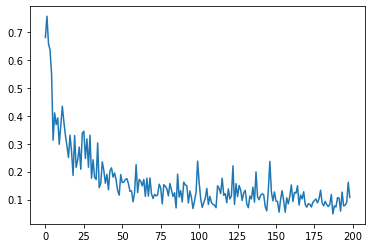

In [8]:
lr = 0.02

print(y_train.shape)
y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mae_tab= baselineModels.tabnetreg(X_train,y_train,X_test,y_test,batch_size,n_features,n_target,n_epochs, lr)
sb.glue("TabNet MAE",mae_tab)